In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = (x_train / 255 - 0.5) * 2
x_test = (x_test / 255 - 0.5) * 2

In [ ]:
x_train.min()

-1.0

In [ ]:
# DISCRIMINATOR

In [ ]:
from keras.layers import Dense, Conv2D, Conv2DTranspose, Reshape, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.models import Sequential

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
discriminator = Sequential([
                            Reshape((28,28,1), input_shape=(28, 28)),

                            Conv2D(64, 5, strides=2),
                            # BatchNormalization(),
                            LeakyReLU(0.2),
                            Dropout(0.3),

                            Conv2D(128, 5, strides=2),
                            # BatchNormalization(),
                            LeakyReLU(0.2),

                            Dropout(0.3),
                            Flatten(),
                            Dense(1, activation="sigmoid")
])

In [ ]:
discriminator.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_56 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        1664      
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 128)       

In [ ]:
discriminator.predict(x_train[5:6])

array([[0.4887974]], dtype=float32)

In [ ]:
# generator
from keras.layers import ReLU, Activation
from keras.activations import tanh

In [ ]:
z_dim = 100

# generator = Sequential([
#                         Dense(6 * 6 * 128, input_shape=(z_dim,)),
#                         BatchNormalization(),
#                         ReLU(),

#                         Reshape((6, 6, 128)),
#                         Conv2DTranspose(64, 3, strides=2),
#                         BatchNormalization(),
#                         ReLU(),

#                         Conv2DTranspose(1, 4, strides=2),
#                         BatchNormalization(),
#                         Activation(tanh),

#                         Reshape((28,28))
# ])

generator = Sequential([
    Dense(7 * 7 * 128, activation='relu', input_shape=(z_dim, )),
    BatchNormalization(),
    Reshape(target_shape=(7, 7, 128,)),

    Conv2DTranspose(64, kernel_size=5, padding='same', strides=2, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(1, kernel_size=5, padding='same', strides=2, activation='tanh'),
    Reshape(target_shape=(28, 28,))
])

In [ ]:
generator.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 6272)              633472    
_________________________________________________________________
batch_normalization_118 (Bat (None, 6272)              25088     
_________________________________________________________________
reshape_57 (Reshape)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_78 (Conv2DT (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_119 (Bat (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_79 (Conv2DT (None, 28, 28, 1)         1601      
_________________________________________________________________
reshape_58 (Reshape)         (None, 28, 28)          

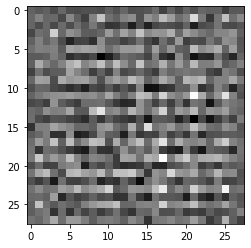

In [ ]:
plt.imshow( generator.predict(np.random.randn(1, z_dim))[0] )

In [ ]:
# entrenamiento

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# discriminator.trainable es true por defecto
discriminator.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
# el generador usa al discriminador como función de coste

discriminator.trainable = False
combined_model = Sequential([generator, discriminator])
combined_model.compile(optimizer="adam", loss="binary_crossentropy") # durante el entrenamiento pondremos labels de 1 para que el generador optimize el output
# binary_crossentropy = -log(out)_label=1 -log(1-output)_label=0 => si el label es siempre 1, estamos minimizando
# loss = -log(out) => estamos maximizando log(out) => queremos que out sea grande
# ver "non-saturating gan loss"

In [ ]:
# entrenamiento

In [ ]:
from tqdm import tqdm

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 0


100%|██████████| 117/117 [00:28<00:00,  4.12it/s]


 gloss: 3.2204959185544446e-12, dloss: 5.237211644271156e-05


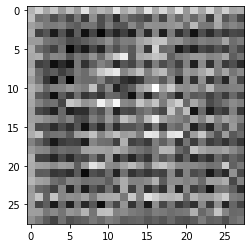

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 1


100%|██████████| 117/117 [00:25<00:00,  4.59it/s]


 gloss: 0.00794550497084856, dloss: 0.020328029990196228


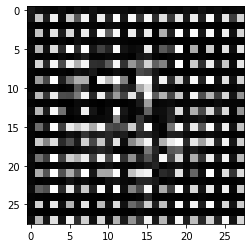

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 2


100%|██████████| 117/117 [00:25<00:00,  4.55it/s]


 gloss: 3.5387215614318848, dloss: 0.06518403813242912


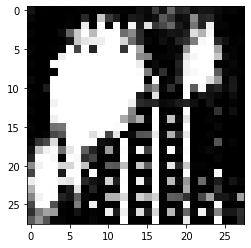

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 3


100%|██████████| 117/117 [00:24<00:00,  4.73it/s]



 gloss: 5.362959861755371, dloss: 0.05017426051199436


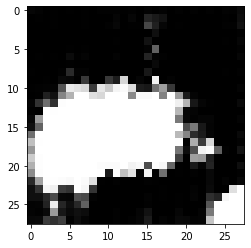

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 4


100%|██████████| 117/117 [00:25<00:00,  4.65it/s]


 gloss: 4.3199005126953125, dloss: 0.0788399837911129


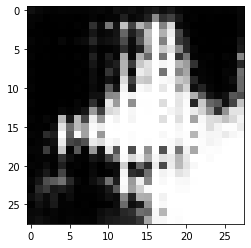

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 5


100%|██████████| 117/117 [00:25<00:00,  4.67it/s]



 gloss: 4.534305095672607, dloss: 0.1562214121222496


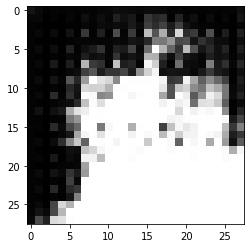

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 6


100%|██████████| 117/117 [00:24<00:00,  4.70it/s]


 gloss: 6.604737758636475, dloss: 0.1233283020555973


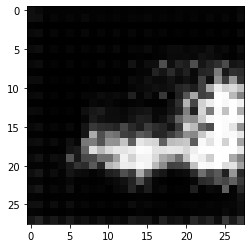

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 7


100%|██████████| 117/117 [00:25<00:00,  4.54it/s]


 gloss: 5.817842483520508, dloss: 0.1247175820171833


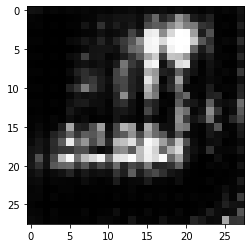

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 8


100%|██████████| 117/117 [00:25<00:00,  4.52it/s]


 gloss: 4.26243257522583, dloss: 0.11190278828144073


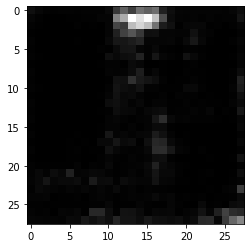

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 9


100%|██████████| 117/117 [00:25<00:00,  4.58it/s]



 gloss: 5.122788429260254, dloss: 0.14216075092554092


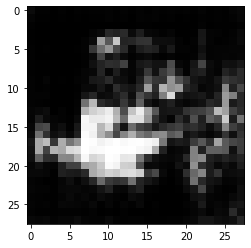

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 10


100%|██████████| 117/117 [00:25<00:00,  4.55it/s]


 gloss: 6.061977386474609, dloss: 0.06449453346431255


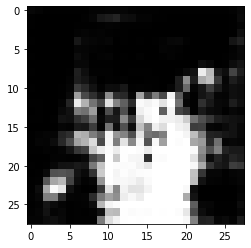

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 11


100%|██████████| 117/117 [00:25<00:00,  4.61it/s]


 gloss: 4.13484525680542, dloss: 0.17225821316242218


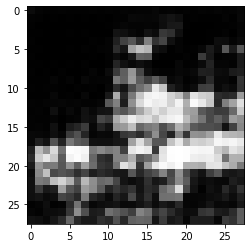

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 12


100%|██████████| 117/117 [00:25<00:00,  4.65it/s]


 gloss: 5.102522850036621, dloss: 0.061451395973563194


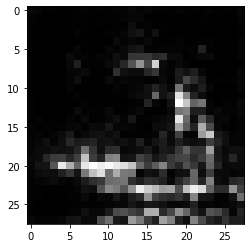

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 13


100%|██████████| 117/117 [00:25<00:00,  4.56it/s]


 gloss: 4.539086818695068, dloss: 0.08254929631948471


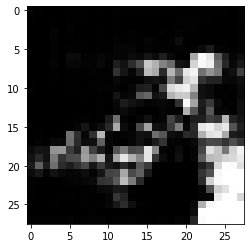

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 14


100%|██████████| 117/117 [00:25<00:00,  4.56it/s]


 gloss: 5.253339767456055, dloss: 0.0906594879925251


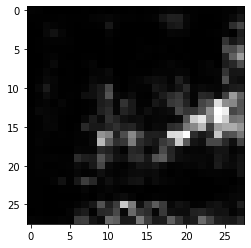

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 15


100%|██████████| 117/117 [00:25<00:00,  4.59it/s]


 gloss: 4.7880330085754395, dloss: 0.06816069036722183


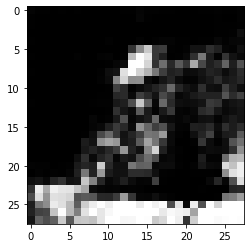

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 16


100%|██████████| 117/117 [00:25<00:00,  4.52it/s]


 gloss: 7.832315444946289, dloss: 0.03478740714490414


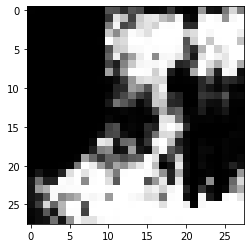

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 17


100%|██████████| 117/117 [00:25<00:00,  4.52it/s]


 gloss: 5.0440673828125, dloss: 0.09935875982046127


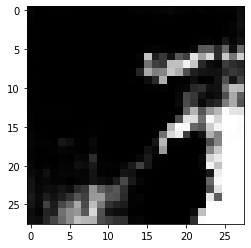

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 18


100%|██████████| 117/117 [00:25<00:00,  4.59it/s]


 gloss: 4.146365165710449, dloss: 0.1373959258198738


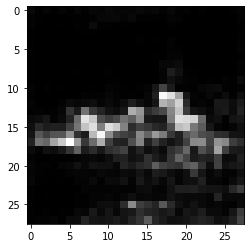

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 19


100%|██████████| 117/117 [00:25<00:00,  4.53it/s]


 gloss: 4.572583198547363, dloss: 0.10439494252204895


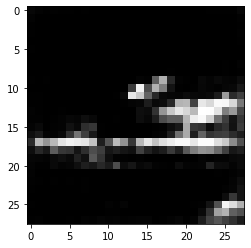

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 20


100%|██████████| 117/117 [00:25<00:00,  4.56it/s]


 gloss: 5.085083961486816, dloss: 0.08138183131814003


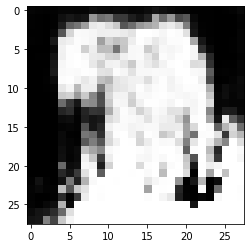

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 21


100%|██████████| 117/117 [00:26<00:00,  4.42it/s]


 gloss: 4.24953031539917, dloss: 0.09852920845150948


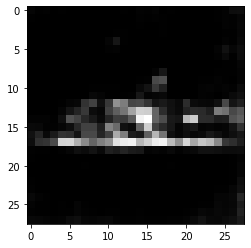

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 22


100%|██████████| 117/117 [00:27<00:00,  4.28it/s]


 gloss: 3.3640553951263428, dloss: 0.20013970881700516


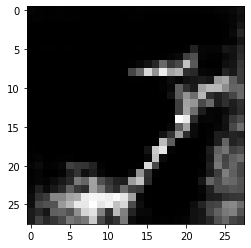

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 23


100%|██████████| 117/117 [00:26<00:00,  4.43it/s]


 gloss: 5.195896148681641, dloss: 0.14549141377210617


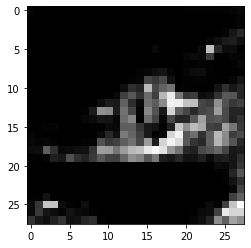

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 24


100%|██████████| 117/117 [00:26<00:00,  4.43it/s]


 gloss: 4.142501354217529, dloss: 0.12013407051563263


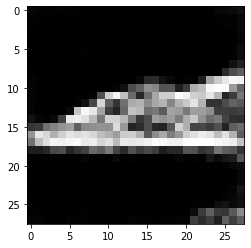

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 25


100%|██████████| 117/117 [00:26<00:00,  4.35it/s]


 gloss: 4.04235315322876, dloss: 0.1757737323641777


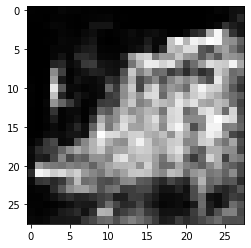

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 26


100%|██████████| 117/117 [00:26<00:00,  4.37it/s]


 gloss: 3.9806323051452637, dloss: 0.20365887135267258


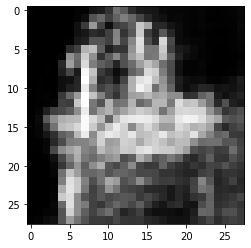

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 27


100%|██████████| 117/117 [00:26<00:00,  4.41it/s]


 gloss: 3.6643669605255127, dloss: 0.19803279638290405


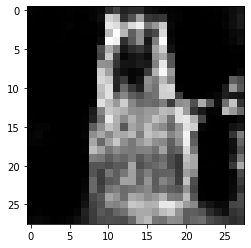

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 28


100%|██████████| 117/117 [00:26<00:00,  4.49it/s]


 gloss: 4.420872211456299, dloss: 0.19305137544870377


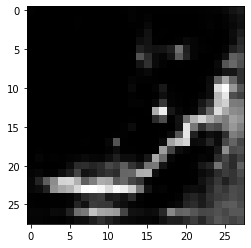

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 29


100%|██████████| 117/117 [00:26<00:00,  4.45it/s]


 gloss: 3.5661063194274902, dloss: 0.1422068551182747


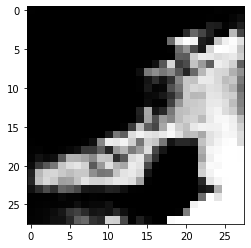

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 30


100%|██████████| 117/117 [00:26<00:00,  4.42it/s]


 gloss: 4.605223178863525, dloss: 0.1744101420044899


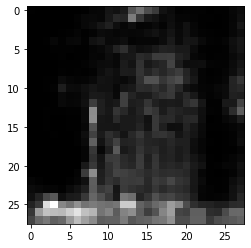

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 31


100%|██████████| 117/117 [00:26<00:00,  4.45it/s]


 gloss: 3.5953330993652344, dloss: 0.1755823940038681


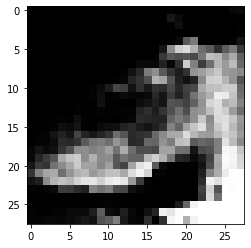

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 32


100%|██████████| 117/117 [00:27<00:00,  4.30it/s]


 gloss: 3.418442487716675, dloss: 0.21723740547895432


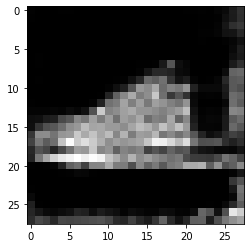

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 33


100%|██████████| 117/117 [00:26<00:00,  4.37it/s]


 gloss: 3.766798973083496, dloss: 0.27655310928821564


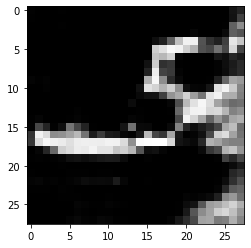

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 34


100%|██████████| 117/117 [00:25<00:00,  4.55it/s]


 gloss: 3.352788209915161, dloss: 0.24539972841739655


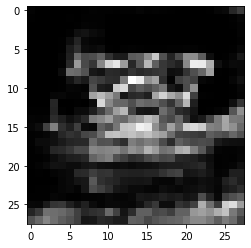

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 35


100%|██████████| 117/117 [00:26<00:00,  4.44it/s]


 gloss: 4.582324028015137, dloss: 0.21232300251722336


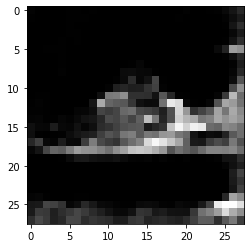

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 36


100%|██████████| 117/117 [00:26<00:00,  4.42it/s]


 gloss: 3.2963552474975586, dloss: 0.23507291823625565


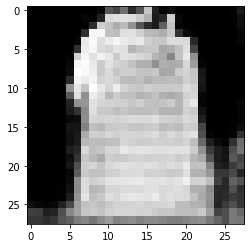

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 37


100%|██████████| 117/117 [00:25<00:00,  4.53it/s]


 gloss: 2.8887245655059814, dloss: 0.28986436128616333


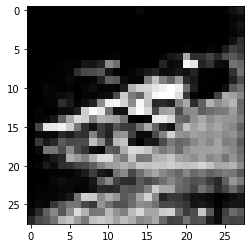

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 38


100%|██████████| 117/117 [00:26<00:00,  4.45it/s]


 gloss: 3.2592644691467285, dloss: 0.2928428202867508


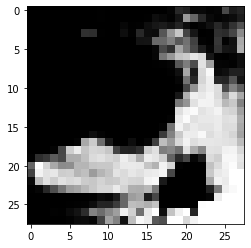

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 39


100%|██████████| 117/117 [00:26<00:00,  4.49it/s]


 gloss: 3.0539307594299316, dloss: 0.3387886881828308


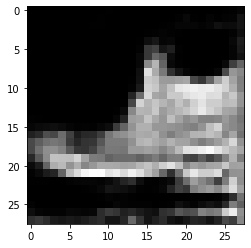

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 40


100%|██████████| 117/117 [00:25<00:00,  4.56it/s]


 gloss: 2.950961112976074, dloss: 0.23417393118143082


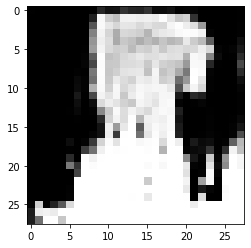

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 41


100%|██████████| 117/117 [00:26<00:00,  4.46it/s]


 gloss: 3.054563045501709, dloss: 0.2994442284107208


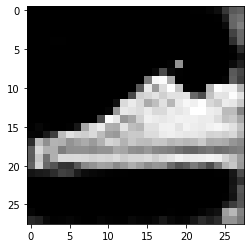

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 42


100%|██████████| 117/117 [00:26<00:00,  4.49it/s]


 gloss: 2.9808478355407715, dloss: 0.372166708111763


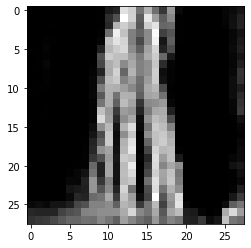

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 43


100%|██████████| 117/117 [00:26<00:00,  4.41it/s]


 gloss: 3.0585594177246094, dloss: 0.2864128202199936


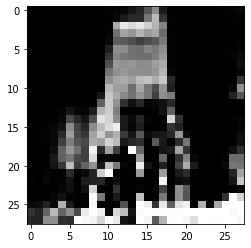

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 44


100%|██████████| 117/117 [00:26<00:00,  4.40it/s]


 gloss: 3.2840969562530518, dloss: 0.30873845517635345


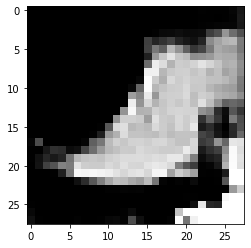

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 45


100%|██████████| 117/117 [00:26<00:00,  4.44it/s]


 gloss: 2.9950830936431885, dloss: 0.3099120706319809


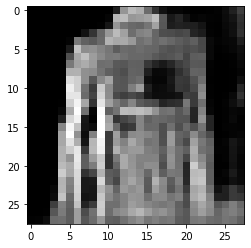

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 46


100%|██████████| 117/117 [00:26<00:00,  4.34it/s]


 gloss: 2.2155117988586426, dloss: 0.34190601110458374


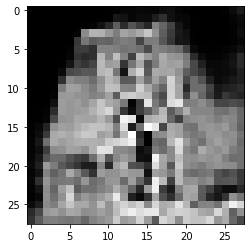

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 47


100%|██████████| 117/117 [00:26<00:00,  4.36it/s]


 gloss: 2.856891393661499, dloss: 0.2986408770084381


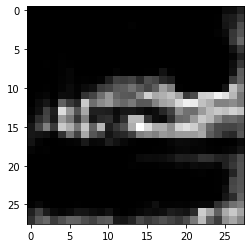

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 48


100%|██████████| 117/117 [00:26<00:00,  4.48it/s]


 gloss: 2.191206216812134, dloss: 0.3473329395055771


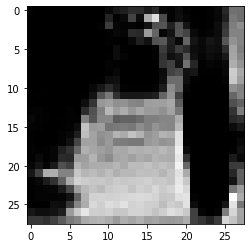

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 49


100%|██████████| 117/117 [00:26<00:00,  4.47it/s]


 gloss: 3.0030508041381836, dloss: 0.3238513022661209


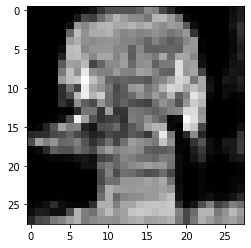

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 50


100%|██████████| 117/117 [00:26<00:00,  4.49it/s]


 gloss: 2.209470748901367, dloss: 0.3783682882785797


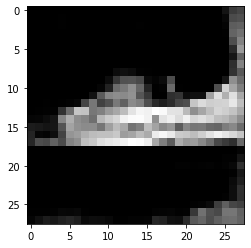

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 51


100%|██████████| 117/117 [00:26<00:00,  4.37it/s]


 gloss: 2.7616095542907715, dloss: 0.32447853684425354


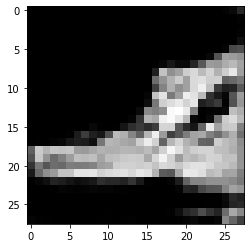

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 52


100%|██████████| 117/117 [00:26<00:00,  4.45it/s]


 gloss: 2.1994142532348633, dloss: 0.3866489976644516


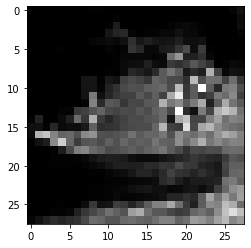

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 53


100%|██████████| 117/117 [00:25<00:00,  4.50it/s]


 gloss: 2.5093936920166016, dloss: 0.410738542675972


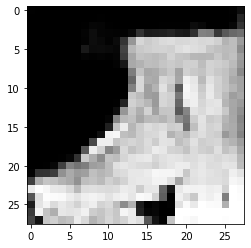

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 54


100%|██████████| 117/117 [00:26<00:00,  4.43it/s]


 gloss: 2.217047691345215, dloss: 0.2989879846572876


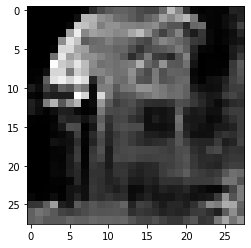

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 55


100%|██████████| 117/117 [00:26<00:00,  4.48it/s]


 gloss: 2.5427191257476807, dloss: 0.3235906958580017


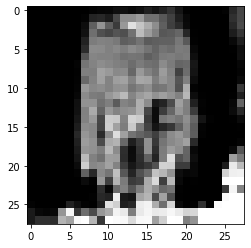

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 56


100%|██████████| 117/117 [00:26<00:00,  4.40it/s]


 gloss: 2.206200361251831, dloss: 0.3691023886203766


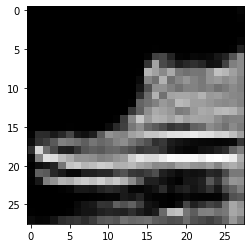

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 57


100%|██████████| 117/117 [00:26<00:00,  4.47it/s]


 gloss: 3.014859199523926, dloss: 0.33352014422416687


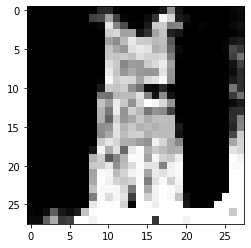

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 58


100%|██████████| 117/117 [00:26<00:00,  4.46it/s]


 gloss: 2.0235791206359863, dloss: 0.3516978621482849


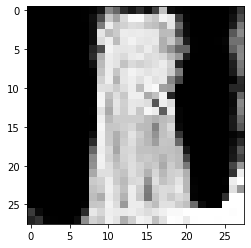

  0%|          | 0/117 [00:00<?, ?it/s]

Epoch 59


100%|██████████| 117/117 [00:25<00:00,  4.51it/s]


 gloss: 2.853804588317871, dloss: 0.3442859947681427


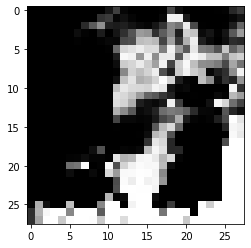

In [ ]:
batch_size = 512
discriminator_iter = 2
epochs = 60

n_batches_epoch = int(x_train.shape[0] / batch_size)
d_losses_epoch = []
g_losses_epoch = []

for epoch in range(epochs):
  print("Epoch", epoch)
  for batch in tqdm(range(n_batches_epoch)):
    d_losses_batch = []
    g_losses_batch = []

    x_real = x_train[batch * batch_size : (batch+1) * batch_size]

    # entrenamos discriminador
    for _ in range(discriminator_iter):
      x_fake = generator.predict(np.random.randn(batch_size, z_dim))
      y_real_fake = np.vstack([np.ones([batch_size, 1]), np.zeros([batch_size, 1])])
      x_real_fake = np.vstack([x_real, x_fake])
      # "discriminator" se ha compilado con trainable = true, por lo que si entrenará al hacer
      # train_on_batch.
      dloss = discriminator.train_on_batch(x_real_fake, y_real_fake)
      d_losses_batch.append(dloss)

    # entrenamos generador
    z_fake = np.random.randn(batch_size, z_dim)
    y_generator = np.ones([batch_size, 1])
    # combined model se ha compilado con discriminator.trainable=false, por lo que no
    # tocará el discriminador al hacer train_on_batch.
    gloss = combined_model.train_on_batch(z_fake, y_generator)
    g_losses_batch.append(gloss)
  
  d_loss_epoch = np.mean(d_losses_batch)
  g_loss_epoch = np.mean(g_losses_batch)
  d_losses_epoch.append(d_loss_epoch)
  g_losses_epoch.append(g_loss_epoch)
  print(f'\n gloss: {g_loss_epoch}, dloss: {d_loss_epoch}')
  plt.imshow( generator.predict(np.random.randn(1,z_dim))[0] )
  plt.show()

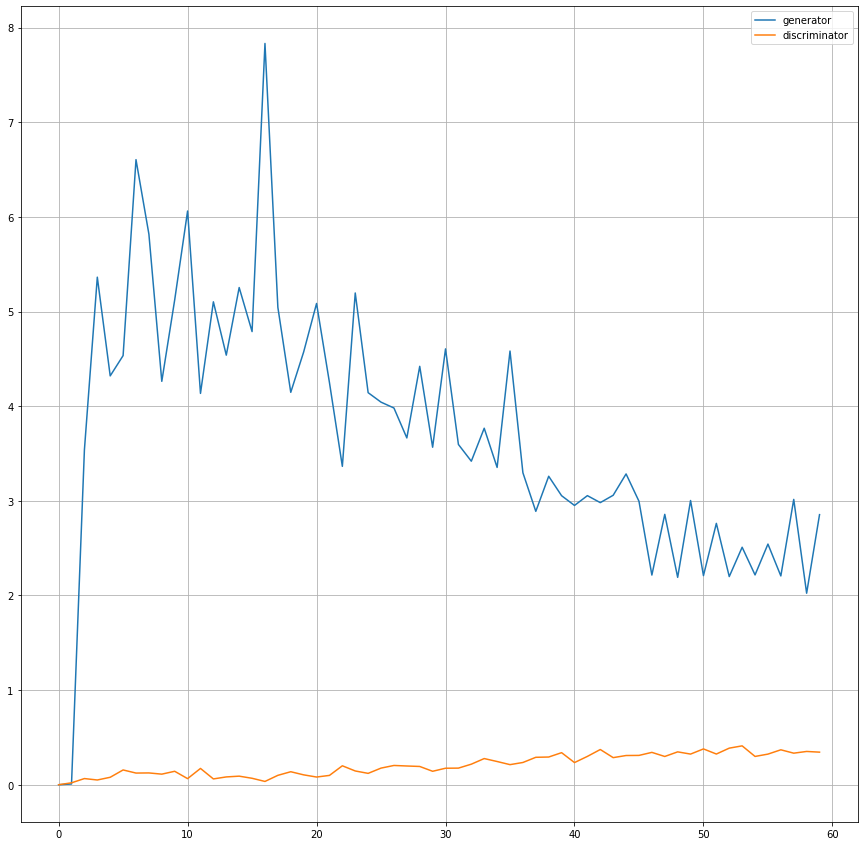

In [262]:
plt.figure(figsize=(15,15))
plt.plot(g_losses_epoch)
plt.plot(d_losses_epoch)
plt.legend(["generator", "discriminator"])
plt.grid()

In [ ]:
  np.vstack([np.random.randn(4, 2, 2), np.random.randn(4, 2, 2)]).shape

(8, 2, 2)

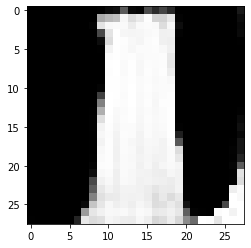

In [268]:
plt.imshow( generator.predict(np.random.randn(1,z_dim))[0] )
